<a href="https://colab.research.google.com/github/maleckicoa/lab-image-classification-using-convolutional-neural-networks/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [83]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# See dataset shape
print('Train Data Shape:', x_train.shape)
print('Test Data Shape:',x_test.shape)
print('Train Targets Shape:',y_train.shape)
print('Test Targets Shape:',y_test.shape)



Train Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Train Targets Shape: (50000, 1)
Test Targets Shape: (10000, 1)


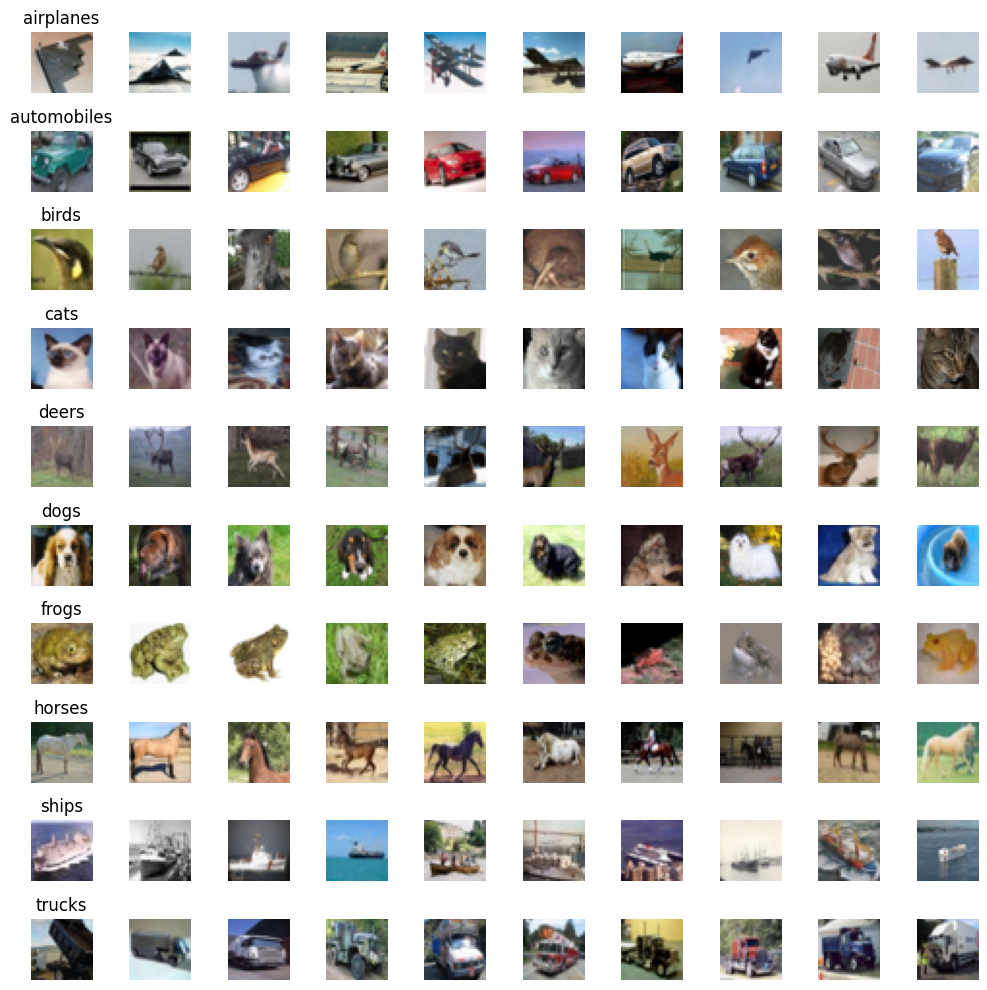

In [84]:
from numpy import random

# Cifar-10 offers no labels, we need to write them
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

plt.figure(figsize=(10, 10))

cnt=0
for class_no, class_name in enumerate(class_names):

  indices = (y_train.flatten() == class_no)

  nums = np.random.randint(0, sum(indices), size=10).tolist()

  images = x_train[indices][nums]

  for image in images:
    cnt+=1
    plt.subplot(10, 10, cnt)

    plt.imshow(image)
    if cnt in range(1,100,10):
      plt.title(f"{class_name}s")

    plt.axis('off')
plt.tight_layout()
plt.show()


In [85]:
from tensorflow.keras.utils import to_categorical


# One-Hot encoding the Target variables
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Standardizing the Input variables
x_train = (x_train/255).astype(float)
x_test = (x_test/255).astype(float)

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [86]:
from keras.backend import clear_session
clear_session()

In [87]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

m1 = Sequential()
m1.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
m1.add(MaxPooling2D(2,2))
m1.add(Flatten())
m1.add(Dense(100, activation="relu"))
m1.add(Dense(10, activation="softmax"))


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [88]:
m1.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

m1_history = m1.fit(x_train,
                 y_train,
                 epochs= 50,
                 batch_size=512,
                 validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.1582 - loss: 2.2743 - val_accuracy: 0.2312 - val_loss: 2.2063
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2435 - loss: 2.1823 - val_accuracy: 0.2768 - val_loss: 2.1072
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2856 - loss: 2.0799 - val_accuracy: 0.3084 - val_loss: 2.0195
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3094 - loss: 1.9922 - val_accuracy: 0.3178 - val_loss: 1.9582
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3258 - loss: 1.9337 - val_accuracy: 0.3274 - val_loss: 1.9183
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3409 - loss: 1.8916 - val_accuracy: 0.3316 - val_loss: 1.8893
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3472 - loss: 1.8700 - val_accuracy: 0.3558 - val_loss: 1.8668
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3567 - loss: 1.8463 - val_accuracy: 0.3564 - v

*   Plot the cross entropy loss curve and the accuracy curve

M1 Results after 50 iterations
accuracy :  0.5539110898971558
loss :  1.2763211727142334
val_accuracy :  0.5382000207901001
val_loss :  1.318743109703064


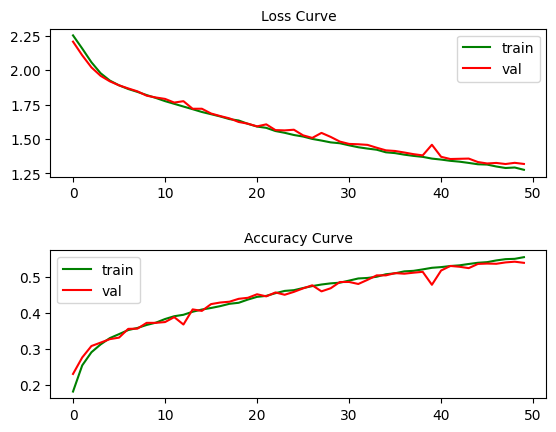

In [89]:
iterations1 = len(m1_history.history[ next(iter(m1_history.history))])

print(f"M1 Results after {iterations1} iterations")
for i in m1_history.history.keys():
  print(i,': ', m1_history.history[i][-1])

plt.subplot(211)
plt.title("Loss Curve", fontsize=10)
plt.plot(m1_history.history['loss'], color='green', label='train' )
plt.plot(m1_history.history['val_loss'], color='red', label='val' )
plt.legend()

plt.subplot(212)
plt.title("Accuracy Curve", fontsize=10)
plt.plot(m1_history.history['accuracy'], color='green', label='train' )
plt.plot(m1_history.history['val_accuracy'], color='red', label='val' )
plt.legend()

plt.subplots_adjust(hspace=0.5)
plt.show()


## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [90]:
from keras.backend import clear_session
clear_session()

In [91]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

m2 = Sequential()
m2.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
m2.add(Conv2D(32, (3,3), activation="relu", padding="same"))
m2.add(MaxPooling2D((2,2)))
m2.add(Flatten())
m2.add(Dense(128, activation="relu"))
m2.add(Dense(10, activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [92]:
m2.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

m2_history = m2.fit(x_train,
                    y_train,
                    batch_size=512,
                    epochs=50,
                    validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.1485 - loss: 2.2812 - val_accuracy: 0.2238 - val_loss: 2.1941
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2454 - loss: 2.1476 - val_accuracy: 0.2834 - val_loss: 2.0398
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.2809 - loss: 2.0297 - val_accuracy: 0.3038 - val_loss: 1.9811
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3203 - loss: 1.9360 - val_accuracy: 0.3174 - val_loss: 1.9290
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3425 - loss: 1.8768 - val_accuracy: 0.3466 - val_loss: 1.8576
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3594 - loss: 1.8335 - val_accuracy: 0.3694 - val_loss: 1.8109
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3747 - loss: 1.7860 - val_accuracy: 0.3744 - val_loss: 1.7743
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.3854 - loss: 1.7634 - val_accuracy: 0.3870 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


M1 Results after 50 iterations
accuracy :  0.5539110898971558
loss :  1.2763211727142334
val_accuracy :  0.5382000207901001
val_loss :  1.318743109703064

M2 Results after 50 iterations
accuracy :  0.5900889039039612
loss :  1.1770778894424438
val_accuracy :  0.557200014591217
val_loss :  1.2529605627059937


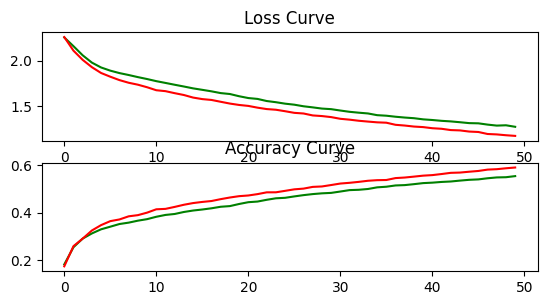

In [93]:
iterations1 = len(m1_history.history[ next(iter(m1_history.history))])
iterations2 = len(m2_history.history[ next(iter(m2_history.history))])

print(f"M1 Results after {iterations1} iterations")
for i in m1_history.history.keys():
  print(i,': ', m1_history.history[i][-1])
print('')

print(f"M2 Results after {iterations2} iterations")
for i in m2_history.history.keys():
  print(i,': ', m2_history.history[i][-1])

plt.subplot(311)
plt.title("Loss Curve")
plt.plot(m1_history.history['loss'], color='green', label='train' )
plt.plot(m2_history.history['loss'], color='red', label='train' )


plt.subplot(312)
plt.title("Accuracy Curve")
plt.plot(m1_history.history['accuracy'], color='green', label='train' )
plt.plot(m2_history.history['accuracy'], color='red', label='train' )

**Comment on the observation**

*Adding additional layer into the CNN and changing the CNN architecture has slighlty improved the validation accuracy and lowered the validation loss*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [94]:
m2_pred = m2.predict(x_test)
m2_pred = np.argmax(m2_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import confusion_matrix
confusion_matrix(m2_pred, y_true)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[659,  53,  83,  25,  44,  20,   3,  52, 126,  67],
       [ 43, 741,  19,  19,   8,   7,  15,  22,  79, 219],
       [ 82,  22, 534, 126, 228, 158, 102,  85,  32,  22],
       [ 21,   9,  59, 387,  60, 231,  44,  82,  17,  24],
       [ 10,   3,  64,  56, 386,  56,  39,  69,   5,   2],
       [  5,   6,  45, 109,  24, 344,  12,  46,   9,   8],
       [ 32,  19, 132, 210, 171, 115, 749,  69,  15,  40],
       [  8,   6,  29,  24,  45,  36,  12, 519,   2,  18],
       [112,  46,  22,  19,  20,  20,  15,  16, 686,  55],
       [ 28,  95,  13,  25,  14,  13,   9,  40,  29, 545]])

**Comment here :**

*The M2 model does not perform well. The confusion matrix shows that when runing the model on the test data, many observations were missclasified*

...

*    Print the test accuracy for the trained model.

In [95]:
test_loss, test_acc = m2.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5532 - loss: 1.2497
Test accuracy: 0.5550000071525574


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [106]:
from keras.backend import clear_session
clear_session()

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Example: CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

# --- Load and resize ---
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_resized = tf.image.resize(x_train, [64, 64])
x_test_resized = tf.image.resize(x_test, [64, 64])

# --- Normalize (on CPU to avoid ResourceExhaustedError) ---
with tf.device('/CPU:0'):
    x_train_resized = tf.cast(x_train_resized, tf.float32) / 255.0
    x_test_resized = tf.cast(x_test_resized, tf.float32) / 255.0

# --- One-hot encode labels ---
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


m3 = Sequential()
m3.add(Conv2D(64, (3,3), activation="relu", padding="same", input_shape=(64, 64, 3)))
m3.add(Conv2D(64, (3,3), activation="relu", padding="same"))

m3.add(MaxPooling2D((2,2)))

m3.add(Conv2D(128, (3,3), activation="relu", padding="same"))
m3.add(Conv2D(128, (3,3), activation="relu", padding="same"))

m3.add(MaxPooling2D((2,2)))

m3.add(Conv2D(256, (3,3), activation="relu", padding="same"))
m3.add(Conv2D(256, (3,3), activation="relu", padding="same"))

m3.add(MaxPooling2D((2,2)))

m3.add(Flatten())
m3.add(Dense(128, activation="relu"))
m3.add(Dense(10, activation="softmax"))

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [111]:
m3.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

m3_history = m3.fit(x_train_resized,
                    y_train,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.1)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 55ms/step - accuracy: nan - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.2458 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.0987 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.1008 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.0992 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.1027 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.1009 - loss: nan - val_accuracy: 0.1024 - val_loss: nan
Epoch 9/10


In [112]:
m3_pred = m3.predict(x_test_resized)
m3_pred = np.argmax(m3_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

confusion_matrix(m3_pred, y_true)

test_loss, test_acc = m3.evaluate(x_test_resized, y_test)
print('M3 Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1019 - loss: nan
M3 Test accuracy: 0.10000000149011612


# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
An activation function decides whether a neuron should “fire” (activate) based on the input it receives.
In mathematical terms, it introduces non-linearity into the network.

Without it, a neural network would just be a stack of linear transformations — meaning no matter how many layers you add, the final output would still be a linear function of the input. That would make it unable to learn complex patterns.


_

2 - Key Differences between sigmoid and softmax:
Sigmoid is used for Binary classification (2 classes: 0 or 1). Softmax is used for Multi-class classification (more than 2 classes)



_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Categorical crossentropy is used for multi-class problems with one correct class per sample and uses a Softmax activation.
Binary crossentropy is used for binary or multi-label problems where each output represents an independent yes/no decision, using a Sigmoid activation.

_


**Additional Model**

In [113]:
from keras.backend import clear_session
clear_session()


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train = (x_train/255).astype(float)
x_test = (x_test/255).astype(float)


m4 = Sequential()
m4.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
m4.add(Conv2D(32, (3,3), activation='relu', padding='same'))
m4.add(MaxPooling2D((2,2)))
m4.add(Dropout(0.2))

m4.add(Conv2D(64, (3,3), activation='relu', padding='same'))
m4.add(Conv2D(64, (3,3), activation='relu', padding='same'))
m4.add(MaxPooling2D((2,2)))
m4.add(Dropout(0.2))

m4.add(Flatten())
m4.add(Dense(128, activation='relu'))
m4.add(Dropout(0.5))
m4.add(Dense(10, activation='softmax'))



from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

m4.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

m4_history = m4.fit(x_train,
                    y_train,
                    batch_size=512,
                    epochs=50,
                    validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.1481 - loss: 2.2542 - val_accuracy: 0.2868 - val_loss: 1.9935
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.2802 - loss: 1.9864 - val_accuracy: 0.3786 - val_loss: 1.7553
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3510 - loss: 1.7984 - val_accuracy: 0.4360 - val_loss: 1.5905
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3953 - loss: 1.6710 - val_accuracy: 0.4464 - val_loss: 1.5417
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4220 - loss: 1.5904 - val_accuracy: 0.4648 - val_loss: 1.5013
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4480 - loss: 1.5323 - val_accuracy: 0.5144 - val_loss: 1.3441
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4787 - loss: 1.4439 - val_accuracy: 0.5260 - val_loss: 1.3178
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4958 - loss: 1.4036 - val_accuracy: 0.5608 - 

In [114]:
m4_pred = m4.predict(x_test)
m4_pred = np.argmax(m4_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

test_loss, test_acc = m4.evaluate(x_test, y_test)
print('M4 Test accuracy:', test_acc)

confusion_matrix(m4_pred, y_true)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7790 - loss: 0.6565
M3 Test accuracy: 0.7734000086784363


array([[810,  14,  64,  19,  17,  10,   5,  13,  57,  27],
       [ 22, 900,   4,   9,   5,   5,   4,   3,  36,  72],
       [ 37,   1, 624,  58,  45,  26,  32,  30,   4,   3],
       [ 14,   5,  43, 539,  50, 131,  40,  17,   7,   5],
       [ 15,   1,  90,  68, 749,  41,  28,  39,   8,   6],
       [  3,   0,  70, 192,  27, 718,  19,  56,   6,   4],
       [  8,   4,  58,  61,  43,  15, 862,   3,   8,   5],
       [ 10,   3,  26,  30,  59,  44,   3, 829,   3,  12],
       [ 48,   9,  10,   9,   5,   5,   5,   2, 849,  12],
       [ 33,  63,  11,  15,   0,   5,   2,   8,  22, 854]])

**Transfer Learning Model**

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.backend import clear_session
from tensorflow.image import resize
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [2]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


#x_train_resized = resize(x_train, (224, 224))
#x_test_resized = resize(x_test, (224, 224))


import numpy as np
import tensorflow as tf
from tensorflow.image import resize

x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

x_train_resized = tf.cast(x_train_resized, tf.float32) / 255.0
x_test_resized = tf.cast(x_test_resized, tf.float32) / 255.0


base_model = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(64, 64, 3)   # instead of 224x224
)

for layer in base_model.layers:
    layer.trainable = False



m5 = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])


opt = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

m5.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)





58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
m5_history = m5.fit(
    x_train_resized, y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.1
)

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.2904 - loss: 2.0091 - val_accuracy: 0.5292 - val_loss: 1.4412
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.4829 - loss: 1.5048 - val_accuracy: 0.5784 - val_loss: 1.2626
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5317 - loss: 1.3545 - val_accuracy: 0.6042 - val_loss: 1.1844
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5577 - loss: 1.2800 - val_accuracy: 0.6158 - val_loss: 1.1274
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5782 - loss: 1.2169 - val_accuracy: 0.6216 - val_loss: 1.1018
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.5882 - loss: 1.1829 - val_accuracy: 0.6370 - val_loss: 1.0606
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6045 - loss: 1.1499 - val_accuracy: 0.6400 - val_loss: 1.0386
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 28s 40ms/step - accuracy: 0.6107 - loss: 1.1257 - 

In [5]:
from sklearn.metrics import confusion_matrix
m5_pred = m5.predict(x_test_resized)
m5_pred = np.argmax(m5_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

test_loss, test_acc = m5.evaluate(x_test_resized, y_test)
print('M5 Test accuracy:', test_acc)

confusion_matrix(m5_pred, y_true)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6698 - loss: 0.9382
M5 Test accuracy: 0.6740999817848206


array([[693,  20,  64,  20,  17,   7,   6,   6,  62,  28],
       [ 18, 756,  11,  28,   8,  15,  16,   9,  41,  77],
       [ 63,   4, 574,  56,  61,  46,  55,  42,  15,   6],
       [ 24,  24,  59, 479,  65, 144,  68,  35,  23,  29],
       [ 14,   4,  80,  38, 569,  38,  53,  41,   7,   4],
       [  4,  14,  69, 175,  42, 601,  52,  58,  10,   6],
       [ 14,  13,  86, 103,  77,  36, 727,   9,  10,   6],
       [ 36,  11,  45,  47, 124,  92,   8, 773,  11,  25],
       [ 84,  30,   8,  12,  18,   3,   8,   7, 772,  22],
       [ 50, 124,   4,  42,  19,  18,   7,  20,  49, 797]])